[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.4 CO2-Emissionen stündlich

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


## Conversion factors
Conversion factors are taken from the OIB RL 6 (2019).

*Hydro, Solar and Wind* were assumed with $f_{PE,n.ern.} = 0$ and $f_{PE,ern.} = 1.$

*Nuclear, Unknown and Battery_Discharge* were assumed with the *Electricity Mix* of $f_{PE,n.ern.} = 0.28$ and $f_{PE,ern.} = 1.32$

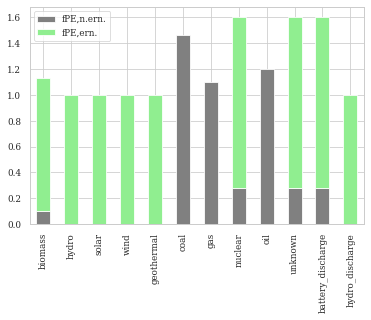

In [4]:
elmap.plot_PE_factors()

In [8]:
em = elmap.fetch_common()
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.sources)}, inplace=True)

PE = elmap.primary_energy(em[elmap.sources])

PE.plot()

In [22]:
fPEs = elmap.pe_factors()

C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * PE_factors_OIB2019[src][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


In [23]:
fPEs.mean()

fPE           1.145228
fPE,n.ern.    0.365442
fPE,ern.      0.776718
dtype: float64

KeyError: "['fPE'] not found in axis"

In [13]:
fPEs.to_csv(DATA_INTERIM / "fPEs_15-19.csv",
          sep=";",
          decimal=",",
          encoding="cp850")

,fPE,"fPE,n.ern.","fPE,ern."
datetime,,,
2015-01-01 00:00:00+00:00,1.301339,0.613351,0.680621
2015-01-01 01:00:00+00:00,1.310484,0.603112,0.699566
2015-01-01 02:00:00+00:00,1.307370,0.595670,0.703969
2015-01-01 03:00:00+00:00,1.300211,0.582146,0.710523
2015-01-01 04:00:00+00:00,1.303767,0.567772,0.728015
...,...,...,...
2019-12-31 19:00:00+00:00,1.090543,0.395771,0.693542
2019-12-31 20:00:00+00:00,1.100709,0.409726,0.689513
2019-12-31 21:00:00+00:00,1.105794,0.409161,0.695022


<AxesSubplot:xlabel='datetime'>

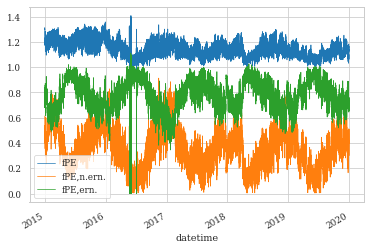

In [24]:
a = elmap.read_interim("fPEs_15-19.csv")
a.plot()